In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

a) Kiểm tra giá trị bị thiếu:

Để kiểm tra giá trị bị thiếu trong Python với thư viện pandas, bạn có thể sử dụng các phương pháp sau:

Sử dụng hàm isnull() kết hợp với sum(): Đếm số lượng giá trị thiếu trong mỗi cột.

In [3]:
# Giả sử dữ liệu đã được load vào DataFrame 'df'
df = pd.read_csv('/wage.csv')

missing_counts = df.isnull().sum()
print("Số lượng giá trị thiếu mỗi cột:\n", missing_counts)

Số lượng giá trị thiếu mỗi cột:
 id            0
nearc2        0
nearc4        0
educ          0
age           0
fatheduc    690
motheduc    353
weight        0
momdad14      0
sinmom14      0
step14        0
reg661        0
reg662        0
reg663        0
reg664        0
reg665        0
reg666        0
reg667        0
reg668        0
reg669        0
south66       0
black         0
smsa          0
south         0
smsa66        0
wage          0
enroll        0
KWW          47
IQ          949
married       7
libcrd14     13
exper         0
lwage         0
expersq       0
dtype: int64


Sử dụng hàm isnull() kết hợp với mean(): Tính tỷ lệ phần trăm giá trị thiếu trong mỗi cột.

In [4]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPhần trăm giá trị thiếu mỗi cột:\n", missing_percentages)


Phần trăm giá trị thiếu mỗi cột:
 id           0.000000
nearc2       0.000000
nearc4       0.000000
educ         0.000000
age          0.000000
fatheduc    22.923588
motheduc    11.727575
weight       0.000000
momdad14     0.000000
sinmom14     0.000000
step14       0.000000
reg661       0.000000
reg662       0.000000
reg663       0.000000
reg664       0.000000
reg665       0.000000
reg666       0.000000
reg667       0.000000
reg668       0.000000
reg669       0.000000
south66      0.000000
black        0.000000
smsa         0.000000
south        0.000000
smsa66       0.000000
wage         0.000000
enroll       0.000000
KWW          1.561462
IQ          31.528239
married      0.232558
libcrd14     0.431894
exper        0.000000
lwage        0.000000
expersq      0.000000
dtype: float64


Kiểm tra giá trị thiếu ở cột kiểu số: Chọn các cột có kiểu dữ liệu số và kiểm tra giá trị thiếu.

In [5]:
missing_numeric = df.select_dtypes(include=['number']).isnull().sum()
print("\nGiá trị thiếu ở cột số:\n", missing_numeric)


Giá trị thiếu ở cột số:
 id            0
nearc2        0
nearc4        0
educ          0
age           0
fatheduc    690
motheduc    353
weight        0
momdad14      0
sinmom14      0
step14        0
reg661        0
reg662        0
reg663        0
reg664        0
reg665        0
reg666        0
reg667        0
reg668        0
reg669        0
south66       0
black         0
smsa          0
south         0
smsa66        0
wage          0
enroll        0
KWW          47
IQ          949
married       7
libcrd14     13
exper         0
lwage         0
expersq       0
dtype: int64


Trực quan hóa giá trị thiếu bằng heatmap: Sử dụng thư viện seaborn và matplotlib để tạo heatmap thể hiện vị trí giá trị thiếu.

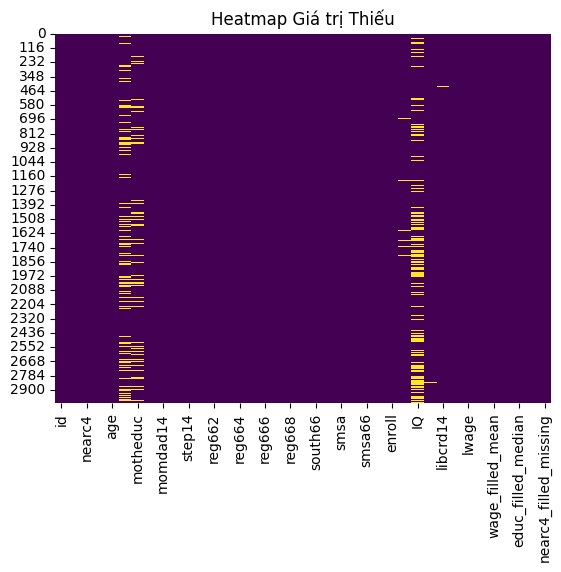

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Giá trị Thiếu')
plt.show()

**b) Xử lý giá trị bị thiếu:**

Có nhiều phương pháp xử lý giá trị bị thiếu. Lựa chọn phương pháp nào phụ thuộc vào đặc điểm dữ liệu và mục tiêu phân tích. Dưới đây là một số phương pháp phổ biến và code minh họa:

Xóa bỏ hàng chứa giá trị thiếu (dropna): Loại bỏ các hàng hoặc cột chứa giá trị NaN. Thích hợp khi số lượng giá trị thiếu ít và việc xóa bỏ không làm mất đi quá nhiều thông tin quan trọng.

In [8]:
# Xóa các hàng chứa ít nhất một giá trị thiếu
df_dropna_rows = df.dropna()

# Xóa các cột chứa ít nhất một giá trị thiếu
df_dropna_cols = df.dropna(axis=1)

# Xóa hàng chỉ khi giá trị thiếu ở các cột cụ thể ('wage', 'educ')
df_dropna_subset = df.dropna(subset=['wage', 'educ'])

Điền giá trị (Imputation): Thay thế giá trị thiếu bằng một giá trị khác.

Điền giá trị trung bình (Mean Imputation): Thay giá trị thiếu bằng giá trị trung bình của cột. Thường dùng cho biến số.

Điền giá trị trung vị (Median Imputation): Thay giá trị thiếu bằng giá trị trung vị của cột. Phù hợp hơn khi dữ liệu có giá trị ngoại lai.

In [9]:
df['wage_filled_mean'] = df['wage'].fillna(df['wage'].mean())

Điền giá trị trung vị (Median Imputation): Thay giá trị thiếu bằng giá trị trung vị của cột. Phù hợp hơn khi dữ liệu có giá trị ngoại lai.

In [11]:
df['educ_filled_median'] = df['educ'].fillna(df['educ'].median())

Điền giá trị Mode (Mode Imputation): Thay giá trị thiếu bằng giá trị xuất hiện nhiều nhất (mode) của cột. Thường dùng cho biến định tính hoặc rời rạc.

In [12]:
df['married_filled_mode'] = df['married'].fillna(df['married'].mode()[0])

Điền giá trị bằng 0 hoặc giá trị đặc biệt: Thay giá trị thiếu bằng một giá trị hằng số như 0 hoặc một giá trị đánh dấu "Missing".

In [13]:
df['exper_filled_zero'] = df['exper'].fillna(0)
df['nearc4_filled_missing'] = df['nearc4'].fillna('Missing')

**Part 2: Organizing and Visualizing Variables**

3. Classify each of the following variables: nearc4, educ, age, black, wage, IQ, married, exper, lwage and expersq.

| Biến       | Loại biến   | Mức đo lường     |
| :---------- | :---------- | :---------------- |
| `nearc4`    | Định tính   | Danh mục (Nominal)   |
| `black`     | Định tính   | Danh mục (Nominal)   |
| `married`   | Định tính   | Danh mục (Nominal)   |
| `reg661`-`reg669` | Định tính   | Danh mục (Nominal)   |
| `south66`, `smsa`, `south`, `smsa66` | Định tính   | Danh mục (Nominal)   |
| `educ`      | Định lượng | Rời rạc/Liên tục   |
| `age`       | Định lượng | Rời rạc/Liên tục   |
| `exper`     | Định lượng | Rời rạc/Liên tục   |
| `libcrd14`  | Định lượng | Rời rạc (Discrete)    |
| `KWW`       | Định lượng | Rời rạc (Discrete)    |
| `wage`      | Định lượng | Liên tục (Continuous) |
| `IQ`        | Định lượng | Liên tục (Continuous) |
| `lwage`     | Định lượng | Liên tục (Continuous) |
| `expersq`   | Định lượng | Liên tục (Continuous) |
| `fatheduc`  | Định lượng | Rời rạc/Liên tục   |
| `motheduc`  | Định lượng | Rời rạc/Liên tục   |
| `weight`    | Định lượng | Liên tục (Continuous) |


 4. Use your subsample to graph for 10 variables in exercise 3. Show characteristics of each the variables.

In [15]:
# Tạo mẫu con ngẫu nhiên 30 quan sát (ví dụ)
subsample_df = df.sample(n=30, random_state=42) # random_state để đảm bảo kết quả giống nhau nếu chạy lại code

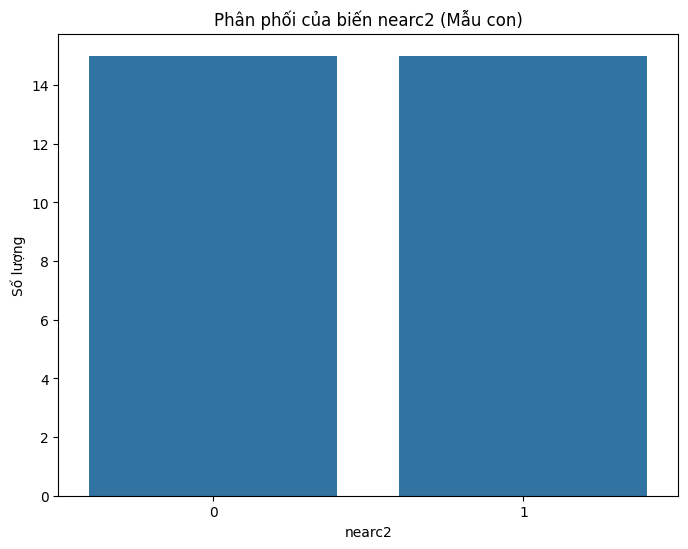


Đặc điểm của biến nearc2:
- Biến định tính/rời rạc.
- Các giá trị/nhóm phổ biến:
- Nhận xét khác (nếu có):
------------------------------


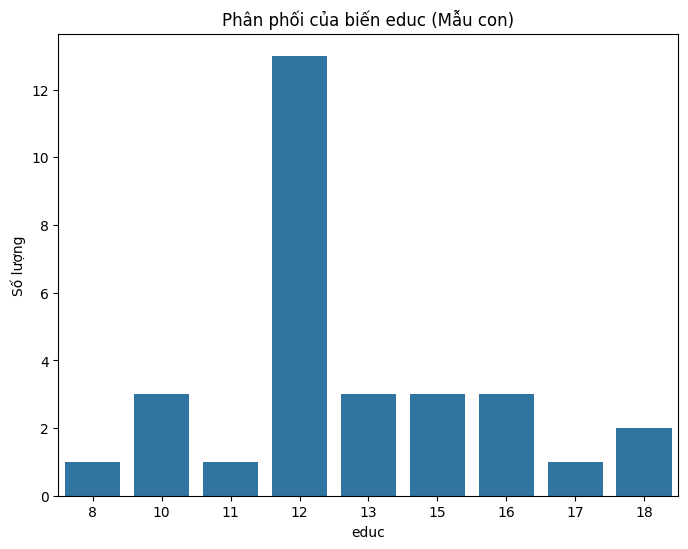


Đặc điểm của biến educ:
- Biến định tính/rời rạc.
- Các giá trị/nhóm phổ biến:
- Nhận xét khác (nếu có):
------------------------------


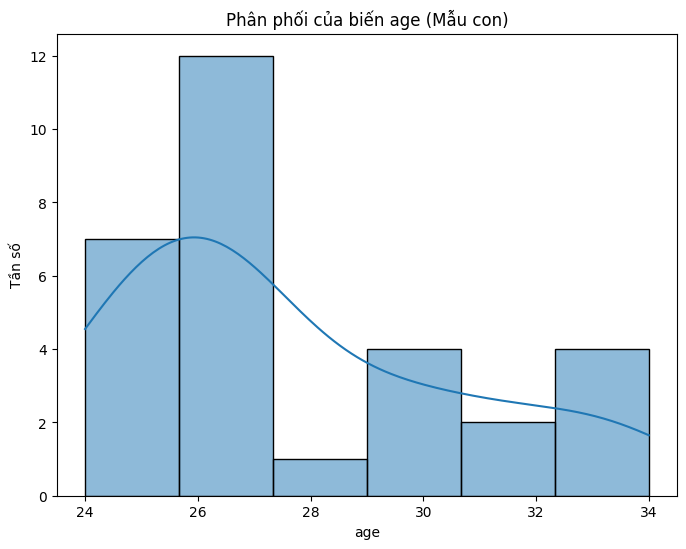


Đặc điểm của biến age:
- Biến định lượng liên tục/rời rạc.
- Hình dạng phân phối:
- Giá trị trung tâm (ước lượng):
- Độ phân tán (ước lượng):
- Giá trị ngoại lai (nếu có):
- Nhận xét khác (nếu có):
------------------------------


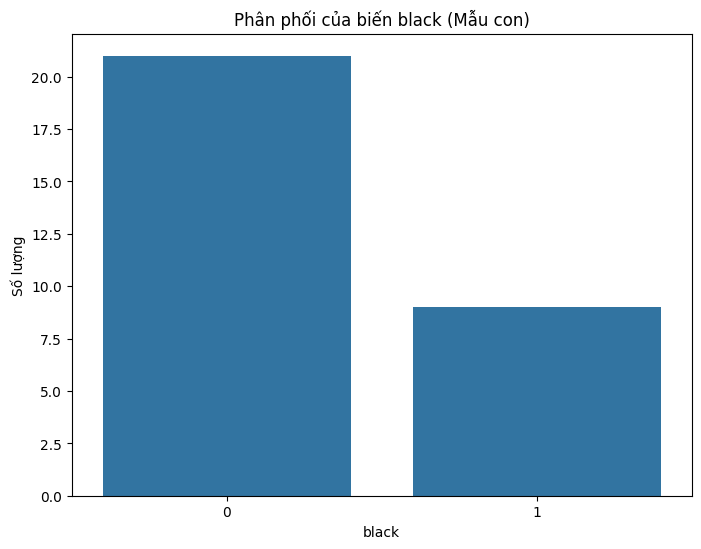


Đặc điểm của biến black:
- Biến định tính/rời rạc.
- Các giá trị/nhóm phổ biến:
- Nhận xét khác (nếu có):
------------------------------


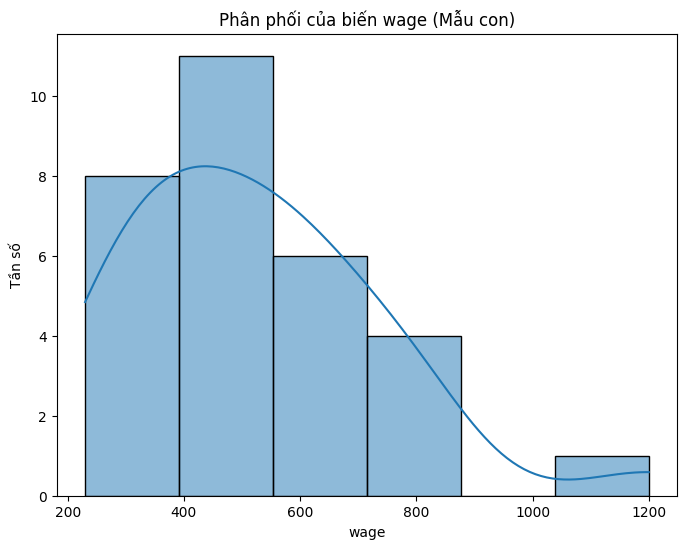


Đặc điểm của biến wage:
- Biến định lượng liên tục/rời rạc.
- Hình dạng phân phối:
- Giá trị trung tâm (ước lượng):
- Độ phân tán (ước lượng):
- Giá trị ngoại lai (nếu có):
- Nhận xét khác (nếu có):
------------------------------


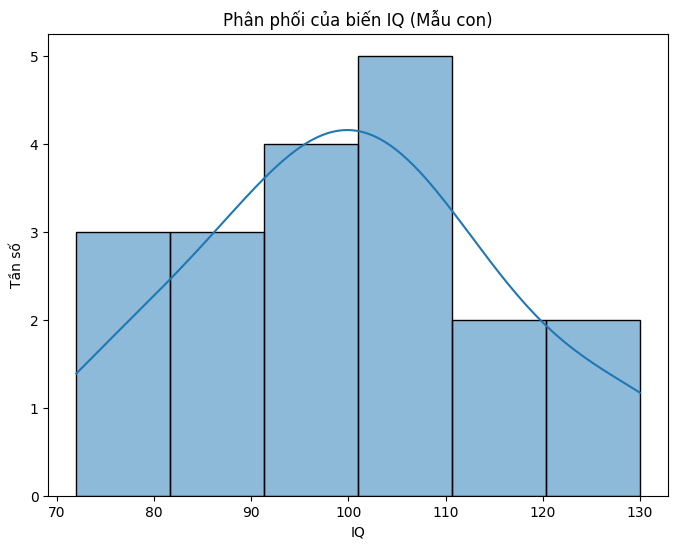


Đặc điểm của biến IQ:
- Biến định lượng liên tục/rời rạc.
- Hình dạng phân phối:
- Giá trị trung tâm (ước lượng):
- Độ phân tán (ước lượng):
- Giá trị ngoại lai (nếu có):
- Nhận xét khác (nếu có):
------------------------------


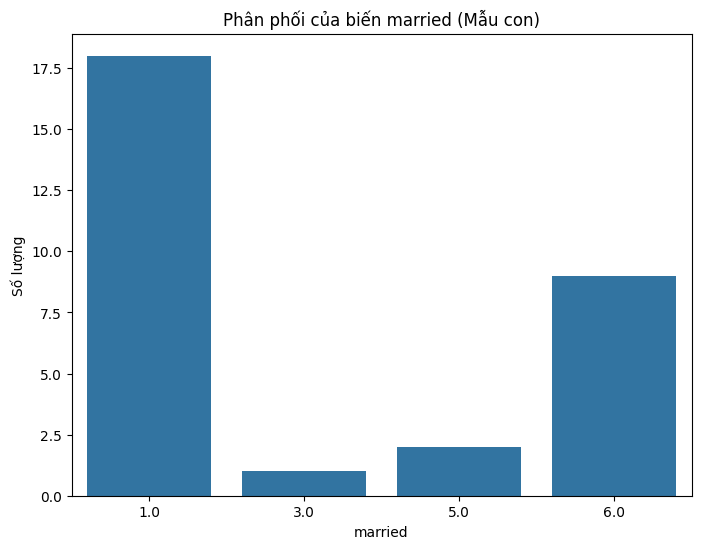


Đặc điểm của biến married:
- Biến định tính/rời rạc.
- Các giá trị/nhóm phổ biến:
- Nhận xét khác (nếu có):
------------------------------


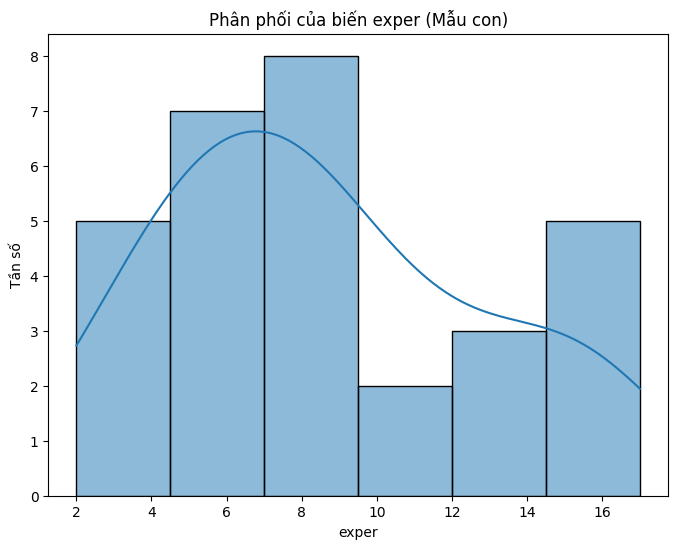


Đặc điểm của biến exper:
- Biến định lượng liên tục/rời rạc.
- Hình dạng phân phối:
- Giá trị trung tâm (ước lượng):
- Độ phân tán (ước lượng):
- Giá trị ngoại lai (nếu có):
- Nhận xét khác (nếu có):
------------------------------


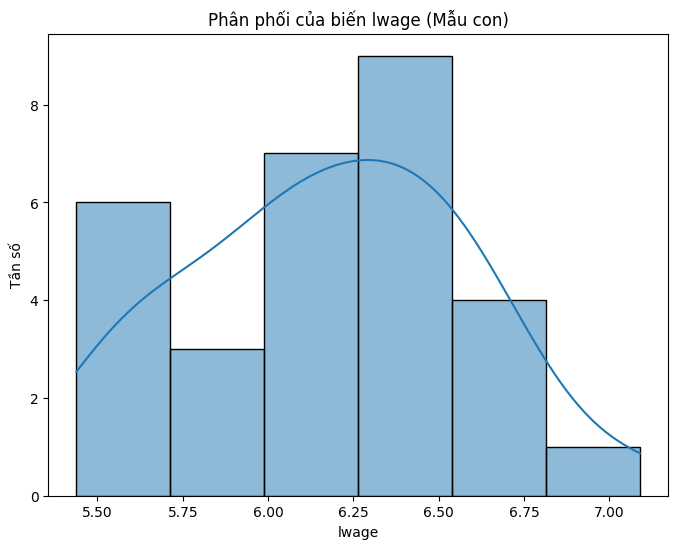


Đặc điểm của biến lwage:
- Biến định lượng liên tục/rời rạc.
- Hình dạng phân phối:
- Giá trị trung tâm (ước lượng):
- Độ phân tán (ước lượng):
- Giá trị ngoại lai (nếu có):
- Nhận xét khác (nếu có):
------------------------------


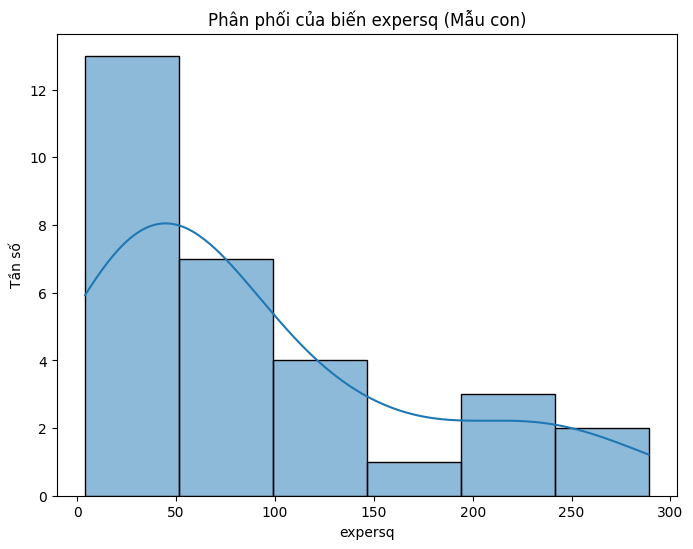


Đặc điểm của biến expersq:
- Biến định lượng liên tục/rời rạc.
- Hình dạng phân phối:
- Giá trị trung tâm (ước lượng):
- Độ phân tán (ước lượng):
- Giá trị ngoại lai (nếu có):
- Nhận xét khác (nếu có):
------------------------------


In [16]:
variables_to_graph = ['nearc2', 'educ', 'age', 'black', 'wage', 'IQ', 'married', 'exper', 'lwage', 'expersq']

for var in variables_to_graph:
    plt.figure(figsize=(8, 6))
    plt.title(f'Phân phối của biến {var} (Mẫu con)')

    if subsample_df[var].dtype == 'object' or subsample_df[var].nunique() < 10:
        sns.countplot(x=var, data=subsample_df)
        plt.xlabel(var)
        plt.ylabel('Số lượng')
    else:
        sns.histplot(subsample_df[var], kde=True)
        plt.xlabel(var)
        plt.ylabel('Tần số')

    plt.show()

    # Mô tả đặc điểm của biến (bạn cần tự điền vào phần này dựa trên đồ thị)
    print(f"\nĐặc điểm của biến {var}:")
    if subsample_df[var].dtype == 'object' or subsample_df[var].nunique() < 10:
        print("- Biến định tính/rời rạc.")
        print("- Các giá trị/nhóm phổ biến:") # Liệt kê các nhóm có tần số cao
        print("- Nhận xét khác (nếu có):") # Ví dụ: phân phối có cân bằng không, có nhóm nào chiếm đa số không?
    else:
        print("- Biến định lượng liên tục/rời rạc.")
        print("- Hình dạng phân phối:") # Ví dụ: Chuẩn, lệch phải, lệch trái, v.v.
        print("- Giá trị trung tâm (ước lượng):") # Quan sát đỉnh histogram
        print("- Độ phân tán (ước lượng):") # Quan sát độ rộng của histogram
        print("- Giá trị ngoại lai (nếu có):") # Quan sát các giá trị xa biệt
        print("- Nhận xét khác (nếu có):") # Ví dụ: phân phối có đối xứng không, có khoảng trống (gap) không?
    print("-" * 30) # Đường phân cách giữa các biến

**Biến định tính/rời rạc (Countplot):**

*   **`nearc4` (Gần trường cao đẳng 4 năm):**
    *   Quan sát biểu đồ cột để xem có bao nhiêu người trong mẫu con sống gần trường cao đẳng 4 năm (thường mã hóa là 1) và bao nhiêu người không (mã hóa là 0).
    *   **Ví dụ mô tả:** "Biến `nearc4` là biến nhị phân. Trong mẫu con, có khoảng [số lượng] người sống gần trường cao đẳng 4 năm và [số lượng] người không. Tỷ lệ người sống gần trường cao đẳng 4 năm là khoảng [tỷ lệ phần trăm]%."
*   **`black` (Chủng tộc da đen):**
    *   Tương tự `nearc4`, xem tỷ lệ người da đen và không phải da đen trong mẫu con.
    *   **Ví dụ mô tả:** "Biến `black` là biến nhị phân chỉ chủng tộc. Mẫu con có tỷ lệ người da đen là khoảng [tỷ lệ phần trăm]%."
*   **`married` (Kết hôn):**
    *   Xem tỷ lệ người đã kết hôn và chưa kết hôn.
    *   **Ví dụ mô tả:** "Biến `married` cho thấy tình trạng hôn nhân. Trong mẫu con, tỷ lệ người đã kết hôn là khoảng [tỷ lệ phần trăm]%."

**Biến định lượng (Histogram):**

*   **`educ` (Số năm học):**
    *   **Hình dạng phân phối:**  "Phân phối của biến `educ` có dạng [ví dụ: lệch phải, gần đối xứng, đa đỉnh]."
    *   **Giá trị trung tâm:** "Dữ liệu tập trung nhiều nhất trong khoảng [khoảng giá trị] năm học, với đỉnh histogram ở khoảng [giá trị năm học]." (Ước lượng bằng mắt từ đồ thị)
    *   **Độ phân tán:** "Phạm vi số năm học trải rộng từ khoảng [giá trị nhỏ nhất] năm đến [giá trị lớn nhất] năm."
    *   **Giá trị ngoại lai:** "Có vẻ không có giá trị ngoại lai đáng kể." (hoặc "Có một vài giá trị ngoại lai ở phía đuôi bên phải/trái.")
    *   **Ví dụ mô tả:** "Biến `educ` có phân phối lệch phải nhẹ, tập trung chủ yếu ở khoảng 12-16 năm học, với đỉnh ở khoảng 12 năm. Phạm vi từ khoảng 6 năm đến 18 năm. Không có giá trị ngoại lai rõ rệt."

*   **`wage` (Tiền lương theo giờ):**
    *   **Hình dạng phân phối:**  "Phân phối của biến `wage` lệch phải rõ rệt."
    *   **Giá trị trung tâm:** "Phần lớn dữ liệu tập trung ở mức lương thấp, dưới [giá trị lương ước tính]."
    *   **Độ phân tán:** "Lương trải rộng từ mức rất thấp đến mức cao hơn nhiều, cho thấy sự phân tán lớn."
    *   **Giá trị ngoại lai:** "Có đuôi bên phải kéo dài, cho thấy một số người có mức lương rất cao (có thể là giá trị ngoại lai)."
    *   **Ví dụ mô tả:** "Biến `wage` có phân phối lệch phải mạnh, cho thấy đa số người lao động trong mẫu có mức lương thấp, trong khi một số ít người có mức lương rất cao.  Có vẻ có một vài giá trị ngoại lai ở đuôi bên phải."

*   **`age`, `IQ`, `exper`, `lwage`, `expersq`:**  Tương tự, bạn hãy tự vẽ histogram cho các biến này và mô tả đặc điểm phân phối, giá trị trung tâm, độ phân tán, và giá trị ngoại lai (nếu có) dựa trên hình dạng đồ thị.